<a href="https://colab.research.google.com/github/hsarfraz/Tiny-Machine-Learning/blob/main/0_9_assignment_CNN_to_classify_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower.

We start by setting up the problem for you.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 -feature scaling (notebook 0.6)
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


We then definte some of the model for you but leave most of it for you to fill in!

*A hint: your model may want to learn some high level features and then classify them.*

In [ ]:
FIRST_LAYER = tf.keras.layers.Conv2D(64, #number of convolutions
                                    (3,3), #size of convolution
                                    activation='relu', #activation function
                                    input_shape=(32, 32, 3) #the shape of the input data in the first layer
                         )
HIDDEN_LAYER_TYPE_1 = tf.keras.layers.MaxPooling2D(2, 2) #the pooling effect is to reduce the image size to a quarter
HIDDEN_LAYER_TYPE_2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_3 = tf.keras.layers.MaxPooling2D(2,2)
HIDDEN_LAYER_TYPE_4 = tf.keras.layers.Flatten()
HIDDEN_LAYER_TYPE_5 = tf.keras.layers.Dense(20, activation='relu')
LAST_LAYER = tf.keras.layers.Dense(10, activation='softmax')

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 [==============================] - 115s 73ms/step - loss: 2.0286 - accuracy: 0.2578 - val_loss: 1.7907 - val_accuracy: 0.3588
Epoch 2/20
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6628 - accuracy: 0.4022 - val_loss: 1.5398 - val_accuracy: 0.4418
Epoch 3/20
1563/1563 [==============================] - 123s 79ms/step - loss: 1.4803 - accuracy: 0.4668 - val_loss: 1.4023 - val_accuracy: 0.4960
Epoch 4/20
1563/1563 [==============================] - 114s 73ms/step - loss: 1.3722 - accuracy: 0.5115 - val_loss: 1.3821 - val_accuracy: 0.5152
Epoch 5/20
1563/1563 [==============================] - 112s 72ms/step - loss: 1.2835 - accuracy: 0.5463 - val_loss: 1.3065 - val_accuracy: 0.5374
Epoch 6/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.2085 - accuracy: 0.5771 - val_loss: 1.2658 - val_accuracy: 0.5552
Epoch 7/20
1563/1563 [==============================] - 107s 68ms/step - loss: 1.1403 - accuracy: 0.6010 - val_loss: 1

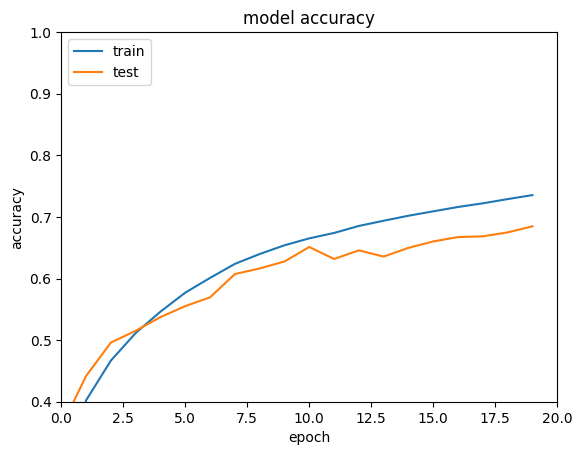

In [ ]:
LOSS = 'sparse_categorical_crossentropy'
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 [==============================] - 116s 73ms/step - loss: 0.1396 - accuracy: 0.9504 - val_loss: 2.5498 - val_accuracy: 0.6741
Epoch 2/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.1223 - accuracy: 0.9567 - val_loss: 2.6085 - val_accuracy: 0.6718
Epoch 3/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.1171 - accuracy: 0.9574 - val_loss: 2.6083 - val_accuracy: 0.6814
Epoch 4/20
1563/1563 [==============================] - 114s 73ms/step - loss: 0.1237 - accuracy: 0.9560 - val_loss: 2.7463 - val_accuracy: 0.6754
Epoch 5/20
1563/1563 [==============================] - 121s 78ms/step - loss: 0.1130 - accuracy: 0.9600 - val_loss: 2.7119 - val_accuracy: 0.6735
Epoch 6/20
1563/1563 [==============================] - 123s 79ms/step - loss: 0.1256 - accuracy: 0.9562 - val_loss: 2.7464 - val_accuracy: 0.6785
Epoch 7/20
1563/1563 [==============================] - 127s 81ms/step - loss: 0.1073 - accuracy: 0.9620 - val_loss: 2

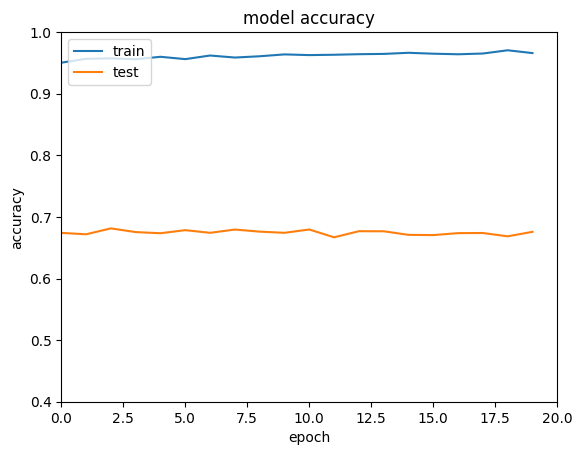

In [6]:
OPTIMIZER = 'adam' #an optimizer with an adaptive learning rate

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()